$$Exercise:1$$

In [98]:
import pandas as pd

In [99]:
df = pd.read_csv('cleveland_heart_attr.csv')

$$Q:1$$

In [100]:
count_rows = len(df.axes[0])
count_cols = len(df.axes[1])
print('No. of rows: ',count_rows, '\nNo. of columns: ',count_cols)

No. of rows:  303 
No. of columns:  14


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     303 non-null    float64
 1   sex                                     303 non-null    float64
 2   chest_pain_type                         303 non-null    float64
 3   rest_bp                                 303 non-null    float64
 4   serum_cholesterol                       303 non-null    float64
 5   fastblood_sugar                         303 non-null    float64
 6   rest_ecg                                303 non-null    float64
 7   max_heartrate                           303 non-null    float64
 8   exercise_angina                         303 non-null    float64
 9   ST_depression_exercise_relativeto_rest  303 non-null    float64
 10  slope_peak_STsegment                    303 non-null    float6

$$Q:2$$

**Here**, the num_major_vessels_fluroscopy column contains the character '?' in the 167, 193, 288, 303 rows and thal column contains the character '?' in the 88, 267 rows. Since, the above mentioned columns contains characters, that's why they have been considered as 'objects'. 

In [102]:
df.describe()

,age,sex,chest_pain_type,rest_bp,serum_cholesterol,fastblood_sugar,rest_ecg,max_heartrate,exercise_angina,ST_depression_exercise_relativeto_rest,slope_peak_STsegment,heart_disease_status
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0463d0a650>]],
      dtype=object)

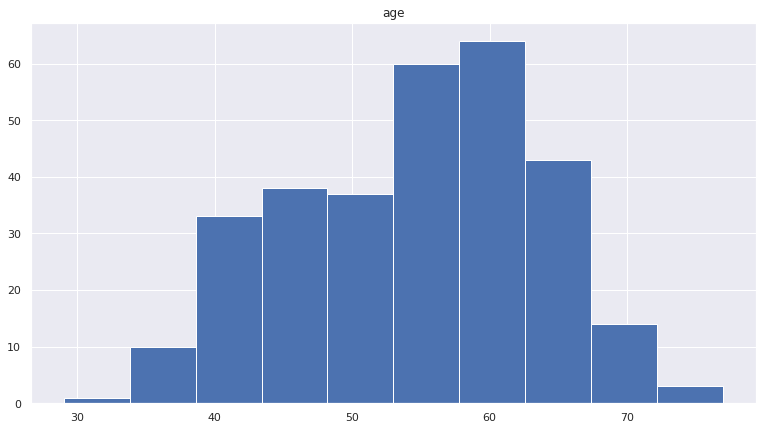

In [103]:
df.hist(column='age')

$$Q:3$$
Here, the no. of bins = 10
And bin size = (77-29)/10 = 4.8

$$Q:4$$

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0463bb5210>]],
      dtype=object)

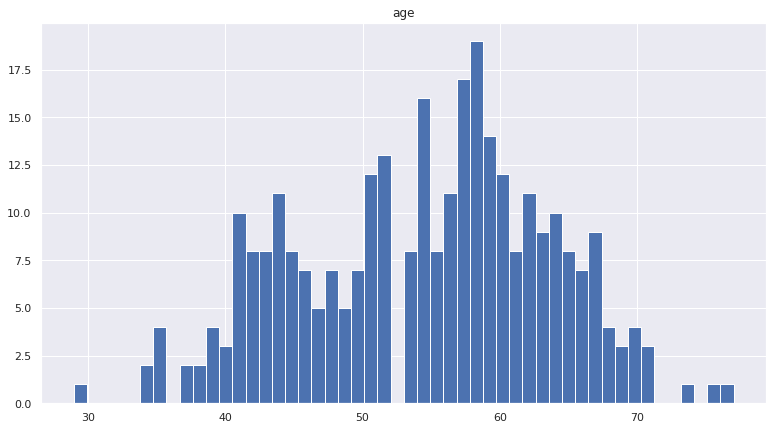

In [104]:
df.hist(column='age',bins=50)

Here, Bin size = (77-29)/50 = 0.96


**Observations:** As we increase the no. of bins, the height of the bars decreases because, the sum of age in each bin decreases due to the decrease in bin size.

In [105]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,7)})

In [106]:
#[R] What is the KDE option useful for in histplot()? Explain the details. 
#[R] Plot pandas based histogram and seaborn based histogram for serum_cholesterol attribute. Use bin sizes from {default, 20, 50, 100, 200, 500}. For seaborn, use KDE. Report the observations. 

$$Q-5: $$
A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

$$Q:6$$

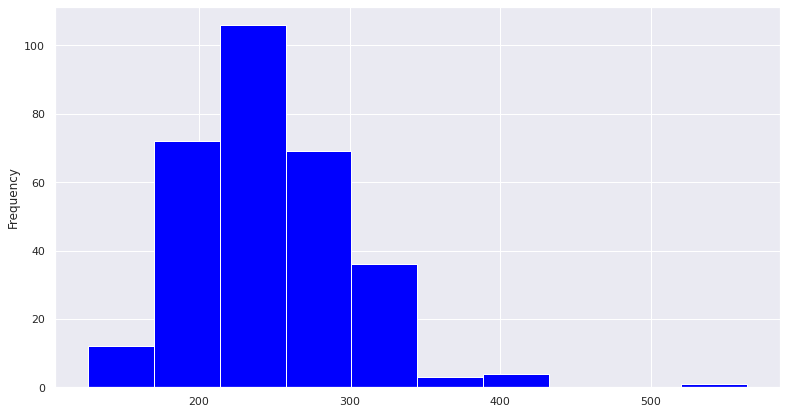

In [107]:
df.serum_cholesterol.plot.hist(color='blue')

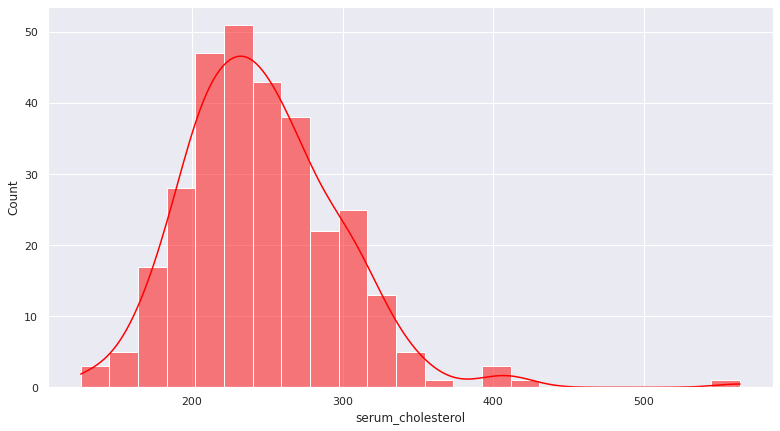

In [108]:
sns.histplot(df.serum_cholesterol,color='red',kde=True)

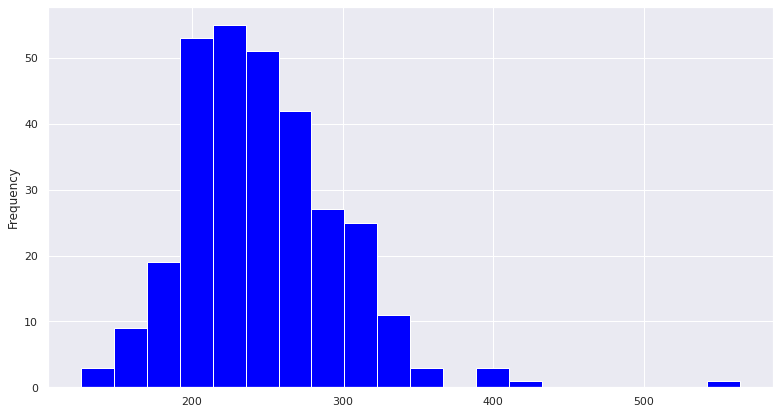

In [109]:
df.serum_cholesterol.plot.hist(bins=20, color='blue')

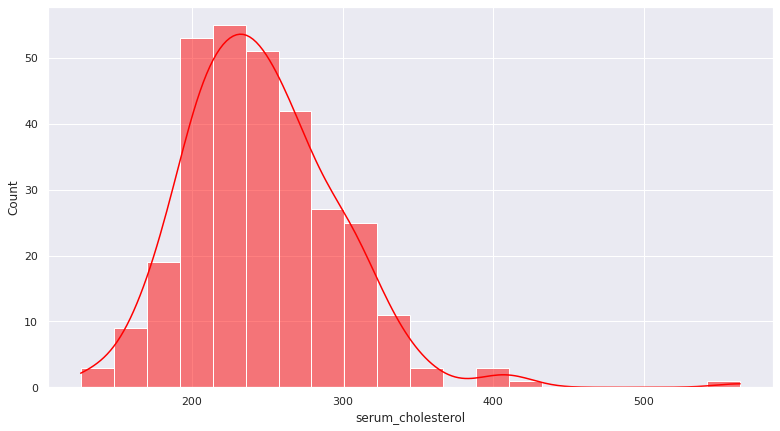

In [110]:
sns.histplot(df.serum_cholesterol,bins=20,color='red',kde=True)

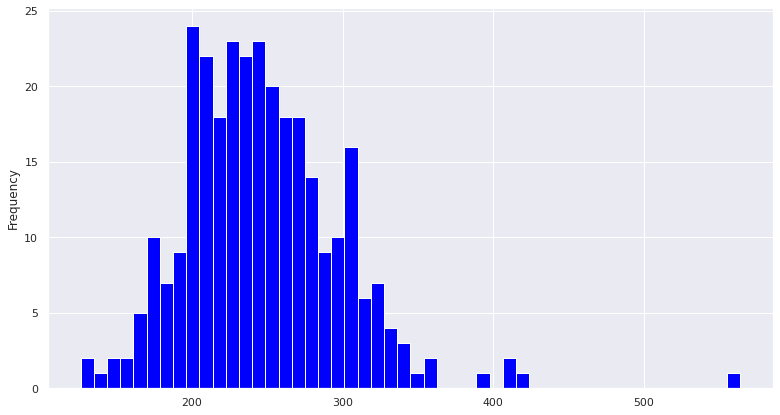

In [111]:
df.serum_cholesterol.plot.hist(bins=50, color='blue')

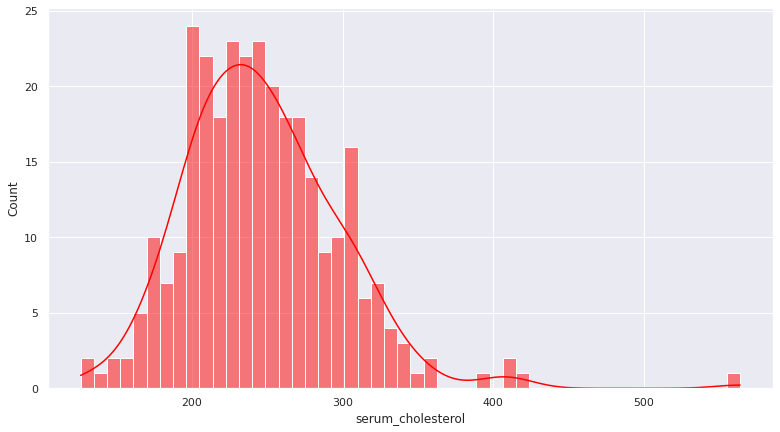

In [112]:
sns.histplot(df.serum_cholesterol,bins=50,color='red',kde=True)

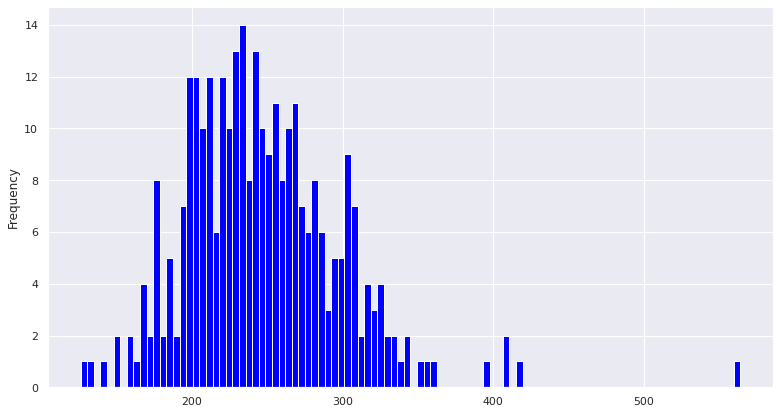

In [113]:
df.serum_cholesterol.plot.hist(bins=100, color='blue')

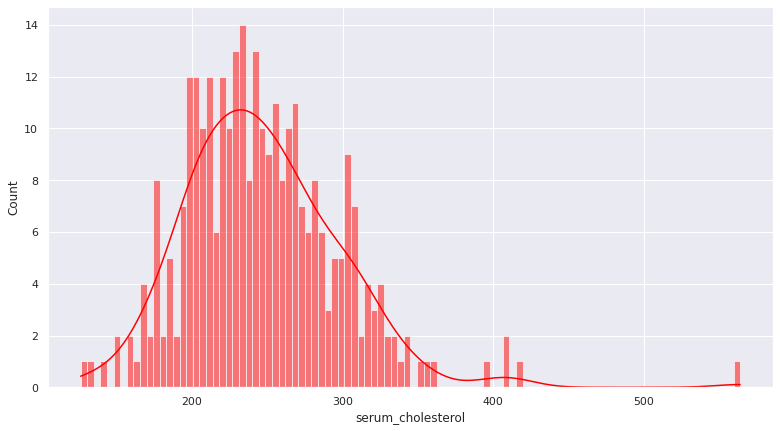

In [114]:
sns.histplot(df.serum_cholesterol,bins=100,color='red',kde=True)

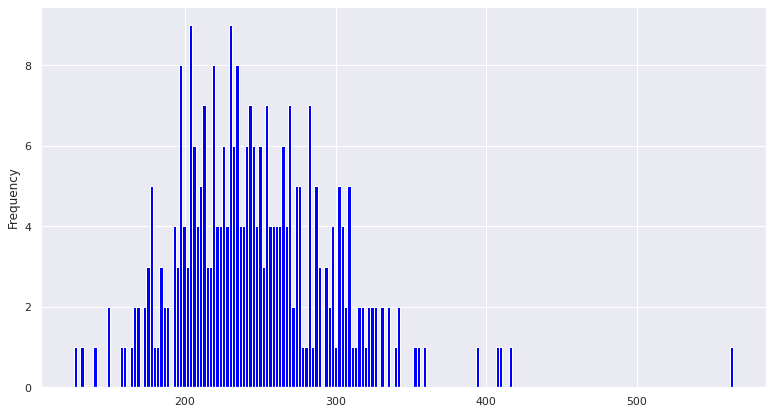

In [115]:
df.serum_cholesterol.plot.hist(bins=200, color='blue')

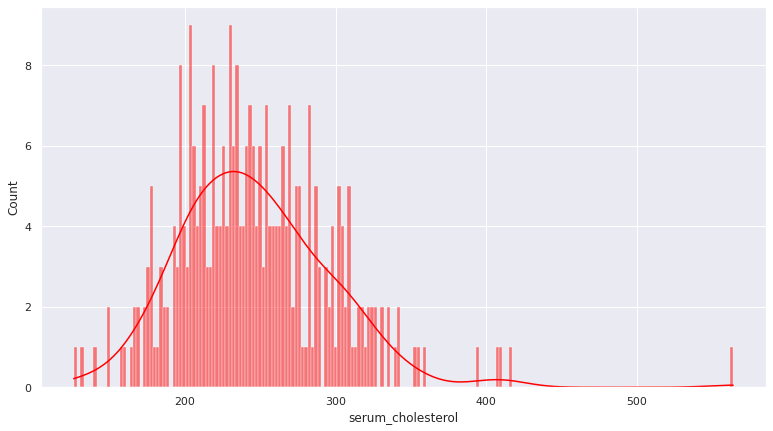

In [116]:
sns.histplot(df.serum_cholesterol,bins=200,color='red',kde=True)

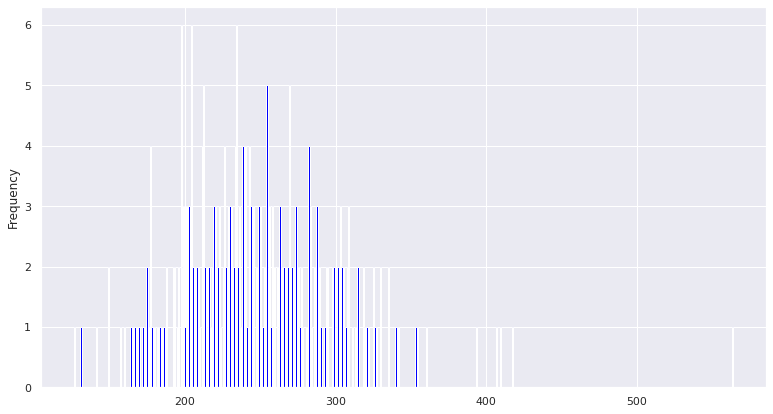

In [117]:
df.serum_cholesterol.plot.hist(bins=500, color='blue')

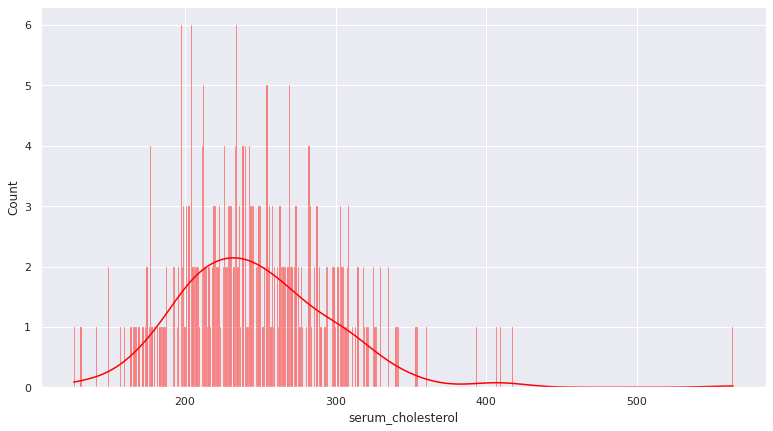

In [118]:
sns.histplot(df.serum_cholesterol,bins=500,color='red',kde=True)

Observations:

Since, number of bins are inversenly proportional to bin size. So, increasing the no. of bins reduces the bin size significintly. Although the shape of the graph remains same but the values of the bars decreases.



$$Q:7$$

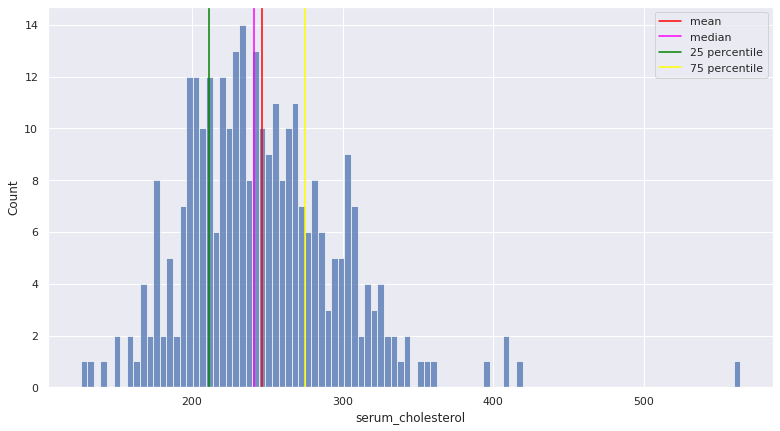

In [119]:
import matplotlib.pyplot as plt
import numpy as np
sns.histplot(df.serum_cholesterol, bins=100)
plt.axvline(x=np.mean(df.serum_cholesterol),color='red',label='mean')
plt.axvline(x=np.median(df.serum_cholesterol),color='magenta',label='median')
plt.axvline(x=np.percentile(df.serum_cholesterol, 25),color='green',label='25 percentile')
plt.axvline(x=np.percentile(df.serum_cholesterol, 75),color='yellow',label='75 percentile')
plt.legend(loc='upper right')

In [120]:
df['gender'] = np.where(df['sex']==1.0,'male','female')

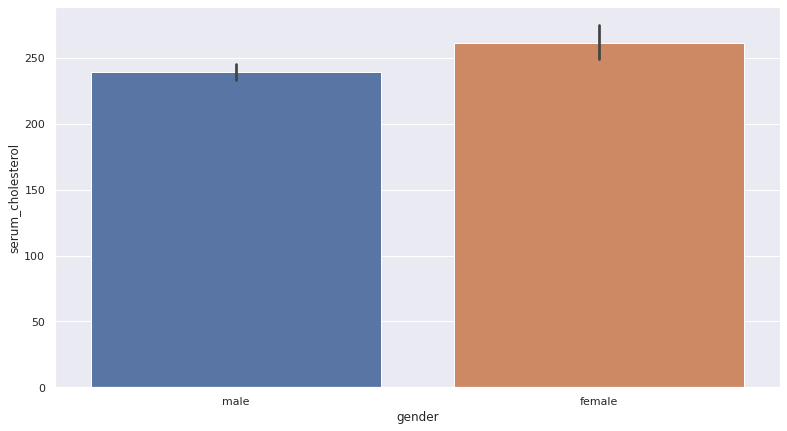

In [121]:
sns.barplot(x="gender",y="serum_cholesterol",data=df)

$$Q:8$$

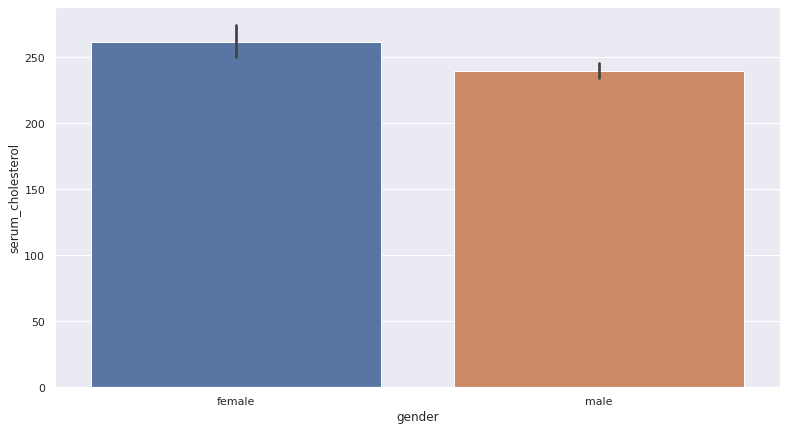

In [122]:
sns.barplot(x="gender",y="serum_cholesterol",data=df, order=['female', 'male'])

Plotting the bar using median estimator:

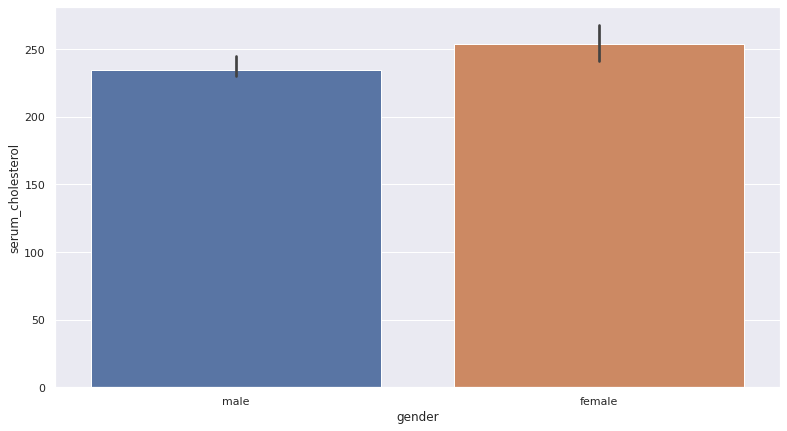

In [123]:
sns.barplot(x="gender",y="serum_cholesterol",data=df,estimator=np.median)

$$Q:9$$

There is slight change in the size and also in the position of the error bar for male in between the bar plot obtained using the median estimator for
gender vs serum cholesterol and the bar plot obtained before.

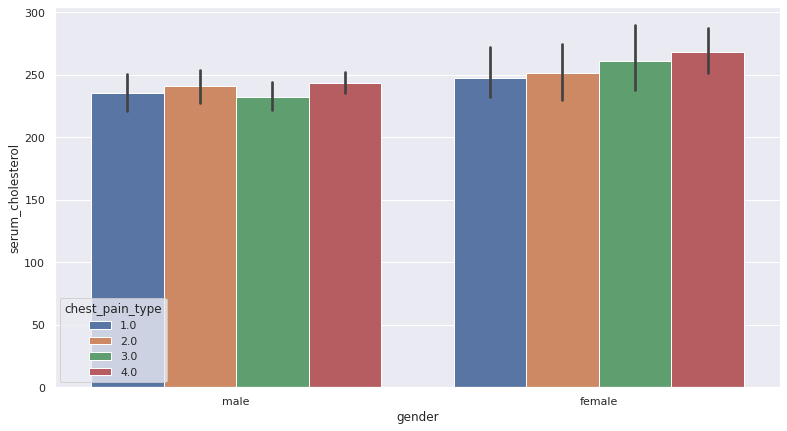

In [124]:
#We can create bar plots with even more fine-grained grouping
#Let us group according to chest_pain_type
sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)

$$Q:10$$

Males with chest pain type 3 and 4 have the minimum and maximum serum cholesterol respectively.

Females with chest pain type 1 and 4 have the minimum and maximum serum cholesterol respectively.

Females are likely to have more serum cholesterol than males.

$$Q:11$$

[Text(0, 0, 'male'), Text(0, 0, 'female')]

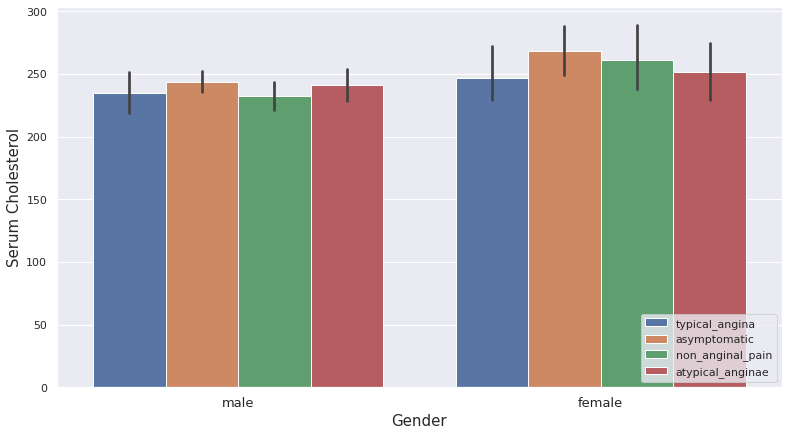

In [125]:
conditions=[df['chest_pain_type']==1,df['chest_pain_type']==2,df['chest_pain_type']==3]
choice=['typical_angina','atypical_anginae','non_anginal_pain']
df['chest_pain_type_description']=np.select(conditions,choice,default='asymptomatic')

ax = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type_description",data=df)
ax.legend(loc='lower right', ncol=1)
ax.set_xlabel("Gender",fontsize=15)
ax.set_ylabel("Serum Cholesterol",fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=13)

$$Q:12$$

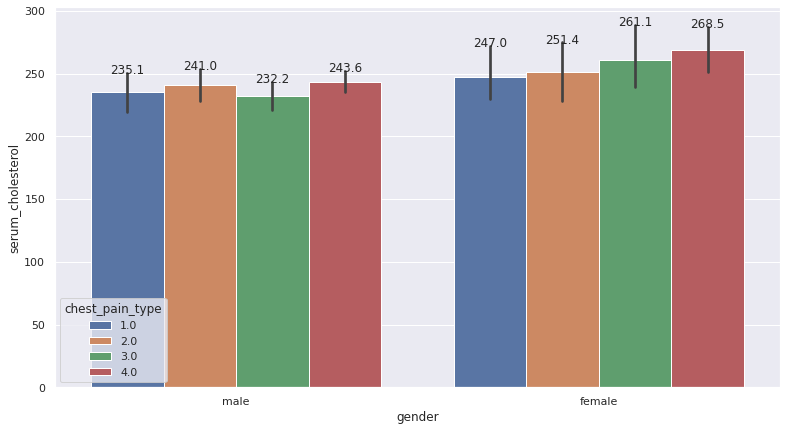

In [126]:
plot = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
for p,line in zip(plot.patches, plot.lines):
    plot.annotate(format(p.get_height(),'.1f'), 
                   (p.get_x() + p.get_width() / 2., line.get_ydata()[1]), 
                   ha = 'center', va = 'top', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

$$Q:13$$

Text(1.4000000000000004, 297.5, 'The average serum cholesterol\n for female of chest pain type 4 is the highest!')

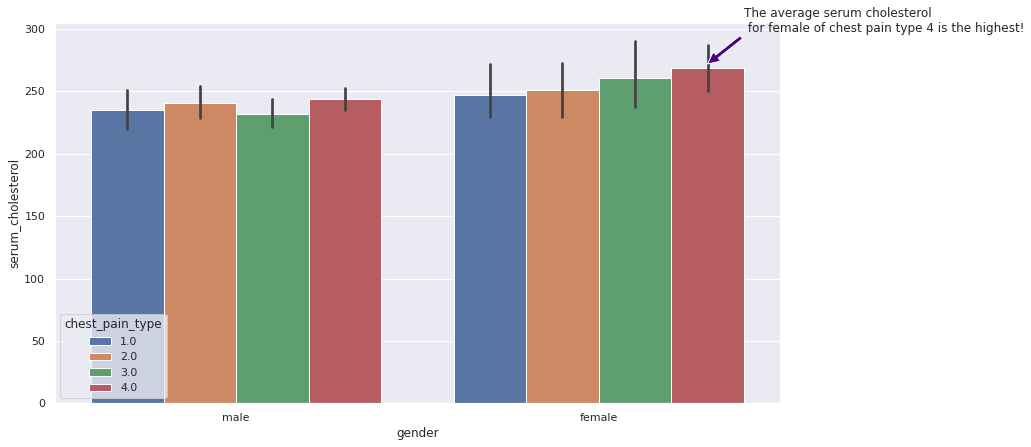

In [127]:
import matplotlib.pyplot as plt
plot = sns.barplot(x="gender",y="serum_cholesterol",hue="chest_pain_type",data=df)
x=plot.patches[7].get_x() + plot.patches[4].get_width() / 2.
y=plot.lines[1].get_ydata()[1]
plt.annotate('The average serum cholesterol\n for female of chest pain type 4 is the highest!', xy=(x,y), xytext=(x+0.1,y+25.5), arrowprops=dict(facecolor='indigo'))

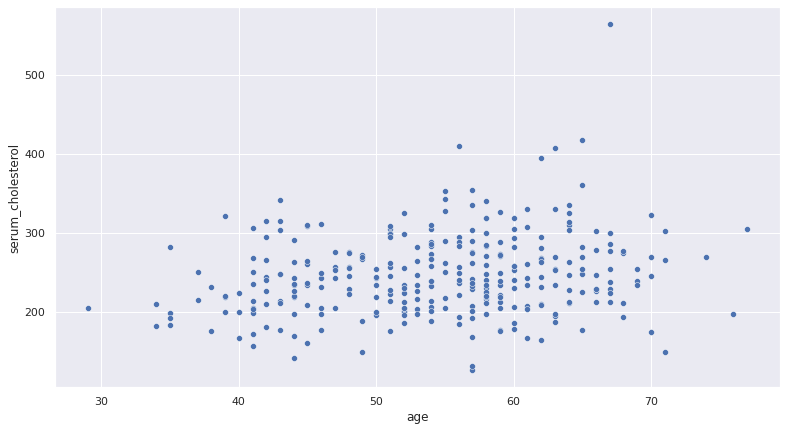

In [128]:
sns.scatterplot(x="age",y="serum_cholesterol",data=df)

$$Q:14$$

**Observations:**

The serum cholesterol level tends to increase as the age increases.

The 40-70 age group have most no. of serum cholesterol data.

The average serum cholesterol value lies in between 200-300.

Only 50-70 age group have samples with serum cholesterol above 400.

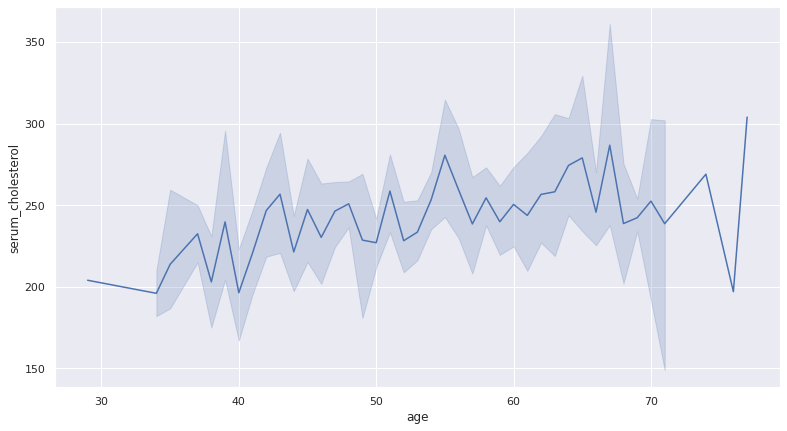

In [129]:
sns.lineplot(x="age",y="serum_cholesterol",data=df)

$$Q:15$$

The light-coloured bands and the dark line indicates the 95% confidence interval and the mean value of the serum cholesterol corresponding to the age respectively.

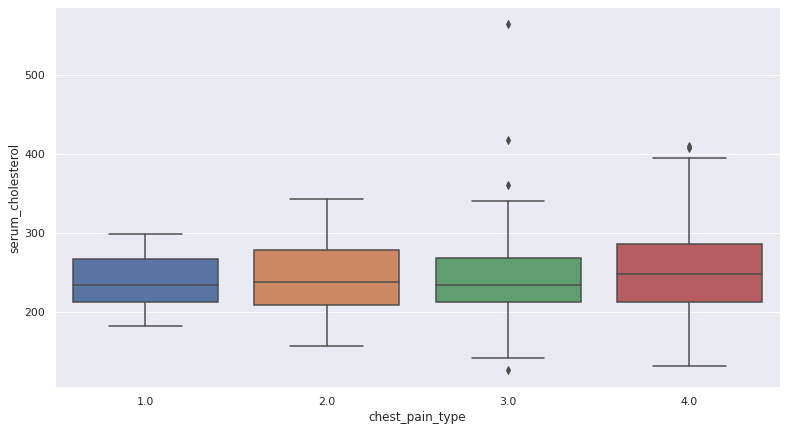

In [130]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",data=df)

$$Q:16$$

The upper and the lower boundaries of the box of chest pain type and serum cholesterol  indicates the 75 and 25 percentile value of the serum cholesterol corresponding to the chest pain type for majority of samples.

The line inside the box indicates the median value of serum cholestero corresponding to the chest pain type.

The points marked beyond
the error bars indicates the outliers.

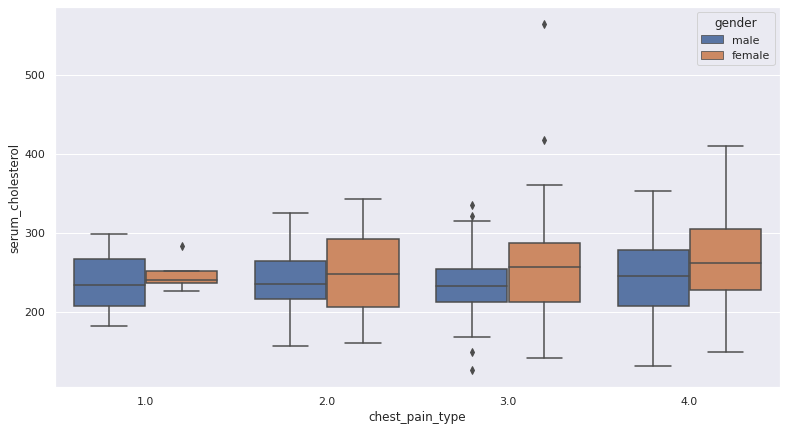

In [131]:
sns.boxplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

$$Q:17$$

The 75 percentile value of serum cholesterol is greater in female than male in all chest pain type except for the 1st type.

The 25 percentile value of serum cholesterol is lower in male than female in all chest pain type except for the 3rd type. But, lowest exists for male in 3rd type too.

The median value of serum cholesterol is greater in females compared to males in all chest pain type.

Females have some serum cholesterol value greater than 400 for 3rd type of chest pain.

$$Q:18$$

Using violin plot to plot the relationship between chest pain type and serum cholesterol

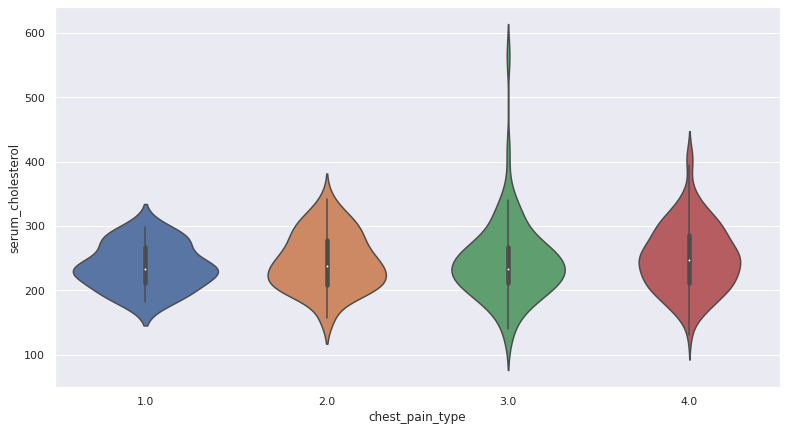

In [132]:
sns.violinplot(x="chest_pain_type",y="serum_cholesterol",data=df)

**Observations:**

The no. of outliers is minimum for 1st type of chest pain.

The no. of outliers is maximum for 3rd type of chest pain.

Grouping the violinplots based on gender information

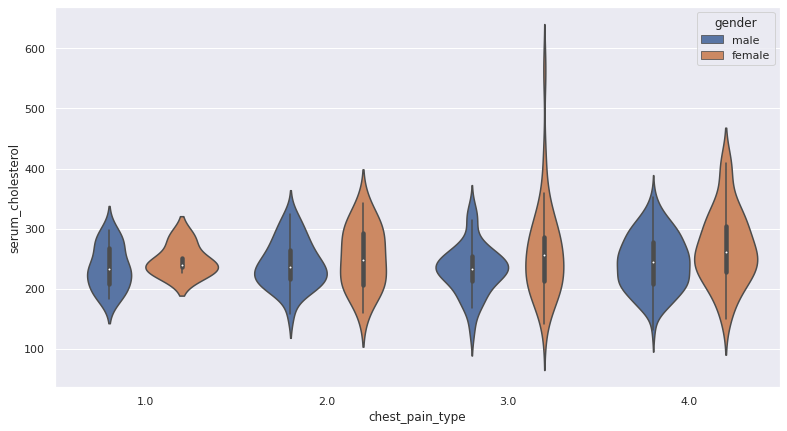

In [133]:
sns.violinplot(x="chest_pain_type",y="serum_cholesterol",hue="gender",data=df)

Observations:

The serum cholesterol values of females is higher compared to males.

The no. of outliers is minimum for type 1 chest pain in females and maximun for type 3 chest pain in females.